***SUPERVISED LEARNING***
---

*Iftika Rahmi F. (18316029) , D. Sholihat Geavonny (18316030), Patricia Margaretha P. (18316031), Shidqie Taufiqurrahman (18316032), Nadia Azka H. P. (18316033)* 

---




*Supervised learning* adalah tugas pembelajaran *machine learning* untuk mempelajari fungsi yang memetakan *input* ke *output* berdasarkan contoh pasangan input-output (*input-output pairs*) [7]. Algoritma-algoritma *supervised learning* dilatih menggunakan contoh-contoh terlabeli (*labeled examples*), yang mana dataset yang digunakan sudah memiliki parameter-parameter *input* dan *output*[1][3]. Sebagai contoh, sebuah peralatan memiliki data points berlabel "F" (*failed*) atau "R" (*run*). Algoritma ini menerima sebuah set *input* dengan *output* yang benar, dan algoritma ini belajar dengan membandingkan *output* yang sebenarnya dengan output yang seharusnya untuk mencari error kemudian algoritma ini memodifikasi modelnya sedemikian rupa [1]. Jenis-jenis *Supervised Learning*, diantaranya:


> Klasifikasi: Klasifikasi merupakan salah satu jenis *supervised learning* yang mana keluarannya berupa nilai diskrit. Tujuan klasifikasi adalah untuk memprediksi nilai-nilai diskrit yang mengarah kepada kelas partikular dan mengevaluasi akurasi. Biasanya digunakan bilangan biner atau *multi class classification*. Pada klasifikasi biner, model ini memprediksi 1 atau 0, benar atau salah. Sedangkan pada *multi-class classification*, model ini memprediksi lebih dari 1 nilai.

> Regresi: Regresi merupakan jenis *supervised learning* yang mana outputnya berupa bilangan kontinyu. Tujuannya adalah untuk memprediksi sebuah nilai sedekat mungkin dengan nilai output yang sesungguhnya dan kemudian evaluasi nya dilakukan dengan menghitung nilai error. Semakin kecil nilai error yang didapat, semakin tinggi nilai akurasi model yang kita buat [3].





#Deskripsi Dataset

Dataset yang digunakan adalah "*Diabetic Retinopathy Debrecen Dataset*", yang diunduh dari *UCI machine learning repository* [1]. Dataset ini berisi fitur yang diekstraksi dari dataset gambar messidor [2] untuk memprediksi apakah suatu gambar mengandung tanda-tanda diabetik retinopati (DR) atau tidak. Berikut beberapa keterangan mengenai dataset ini,

•	Karakteristik Dataset = Multivarian<br>
•	Karakteristik Atribut = Integer, Real<br>
•	Tugas Terkait = Klasifikasi<br>
•	Jumlah Data = 1151<br>
•	Jumlah Atribut = 20<br>
•	Nilai yang Tidak Ada = N/A

Semua fitur mewakili lesi yang terdeteksi, fitur deskriptif dari bagian anatomi atau deskriptor tingkat gambar. Metode analisis gambar dan ekstraksi fitur yang mendasari telah dijelaskan pada paper "*An ensemble-based system for automatic screening of diabetic retinopathy*" oleh Balint Antal dan Andras Hajdu [3].

Berikut penjelasan mengenai atribut yang dimiliki dataset ini,<br>
id) Kode unik tiap data<br>
0) Hasil biner dari penilaian kualitas. 0 = kualitas buruk 1 = kualitas cukup.<br>
1) Hasil biner dari pra-skrining, di mana 1 menunjukkan kelainan retina yang parah dan 0 kebalikannya.<br>
2-7) Hasil deteksi mikroaneurisma. Setiap nilai fitur mewakili
jumlah mikroaneurisma yang ditemukan pada tingkat kepercayaan alpha = 0,5 sampai 1, bertambah 0,1 secara berurutan.<br>
8-15) berisi informasi yang sama dengan 2-7 untuk eksudat. Namun,
sebagai eksudat diwakili oleh seperangkat poin daripada jumlah
piksel membangun lesi, fitur-fitur ini dinormalisasi dengan membagi
jumlah lesi dengan diameter ROI (*Region of Interest*) untuk mengkompensasi gambar yang berbeda
ukuran.<br>
16) Jarak pusat euclidean
makula dengan pusat optik disk untuk memberikan informasi penting
mengenai kondisi pasien. Fitur ini
juga dinormalisasi dengan diameter ROI (*Region of Interest*).<br>
17) Diameter optik disk.<br>
18) Hasil biner dari klasifikasi berbasis AM / FM (*amplitude-modulation frequency-modulation*).<br>
19) Label kelas. 1 = mengandung tanda-tanda Diabetik Retinopati (label akumulatif untuk kelas Messidor 1, 2, 3), 0 = tidak ada tanda-tanda Diabetic Retinopati. [1]

#***PRE-PROCESSING***

Sebelum melakukan klasifikasi perlu adanya tahap *pre-processing* yang bertujuan untuk memastikan bahwa data input pada klasifikasi sudah bersih dan baik. 
Adapun pada percobaan ini penulis melakukan tahap *pre-processing* berupa:
1.   Pengecekan dan eliminasi nilai NaN pada file untuk membersihkan data
2.   Visualisasi data untuk memastikan data sudah baik












##Melakukan *import Library* dan *Package*

Penulis akan menggunakan *module* Numpy, Pandas, Matplotlib, dan Seaborn untuk membantu penulis memanipulasi data dan memvisualisasikan fitur/label serta mengukur seberapa baik kinerja model. Numpy dan Pandas digunakan untuk memanipulasi *dataframe* serta kolom dan sel. Selain itu penulis juga akan menggunakan matplotlib bersama dengan Seaborn untuk memvisualisasikan data.


In [ ]:
import numpy as np #library yang digunakan untuk melakukan operasi vektor dan matriks
import pandas as pd #library yang digunakan untuk melakukan operasi pengolahan data dalam berbagai jenis data

import seaborn as sns #libary yang dugunakan untuk melakukan visualisai data vektor matriks dengan matplotlib
from matplotlib import pyplot as plt #melakukan plot menggunakan matplotlib
%matplotlib inline
sns.set_style("whitegrid")

import warnings # libary untuk menunjukan adanya pemberitahuan 
warnings.filterwarnings("ignore")

##Loading and Viewing Dataset

Dengan Pandas, dataset yang akan digunakan dapat dimuat. Pada kasus ini, dataset dimuat dalam bentuk *dataframe*. Sebelum memulai *pre-processing*, data pada tabel harus dilihat untuk melihat nilai-nilai yang akan dikerjakan. Fungsi *head* dan *describe* dapat digunakan untuk melihat beberapa data sampel dan statistik. Pandas library dapat menampilkan data yang sesuai untuk analisis data melalui struktur data *series* dan *dataframe*, dan Pandas library dapat membaca data dari berbagai macam format seperti csv, tsv, Ms. excel, dan sebagainya. 

In [ ]:
df = pd.read_csv(r'E:\Nugaaass\Biomedical Engineering\Pengenalan Pola\BUKUUU\csv_result-messidor_features.csv', header='infer')

In [ ]:
df.head(10) #menampilan 10 data teratas pada dataset

,id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,Class
0,1,1,1,22,22,22,19,18,14,49.895756,...,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,...,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,...,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,...,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,...,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,6,1,1,44,43,41,41,37,29,28.356400,...,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,7,1,0,29,29,29,27,25,16,15.448398,...,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1
7,8,1,1,6,6,6,6,2,1,20.679649,...,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1,0
8,9,1,1,22,21,18,15,13,10,66.691933,...,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0,1
9,10,1,1,79,75,73,71,64,47,22.141784,...,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0,1


In [ ]:
df.describe() #menampilan komponen statistika dasar pada dataset

,id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,...,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,576.000000,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,...,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,332.409386,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,...,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,288.500000,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,...,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,576.000000,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,...,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,863.500000,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,...,11.766880,1.921649,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1151.000000,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,...,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


##1. Pengecekan dan eliminasi nilai NaN

Sebelum proses training dan testing, ada baiknya apabila dilihat terlebih dahulu kualitas data yang akan digunakan. Tidak semua dataset memiliki nilai pada tiap datanya, ada juga yang berisikan nilai NaN. Nilai NaN ini dapat diatasi dengan menghilangkan kolom yang memiliki banyak nilai NaN, menghilangkan baris yang memiliki nilai NaN, ataupun mengisi nilai NaN dengan nilai pengganti, agar model yang digunakan memiliki prediksi lengkap untuk setiap baris dalam kumpulan data. Proses pengisian nilai NaN dengan nilai pengganti dikenal sebagai imputasi. Untuk memeriksa apakah ada nilai NaN pada data kita, dapat digunakan fungsi *isnull* dari pandas.

In [ ]:
def null_table(df): #menghitung nilai N/A pada dataset
    print(pd.isnull(df).sum()) 

null_table(df)

id       0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
Class    0
dtype: int64


Pada percobaan ini, penulis menggunakan fungsi null_table yang digunakan untuk melakukan pengecekan terhadap nilai NaN tiap kolom. Adapun hasil yang dikeluarkan oleh fungsi ini adalah berupa jumlah baris pada tiap kolom yang memiliki nilai NaN. Berdasarkan fungsi tersebut, dapat diamati bahwa hasil keluaran fungsi tersebut dengan menggunakan input dataset milik penulis menghasilkan angka 0 di semua kolomnya. Dengan demikian, dataset yang penulis gunakan pada percobaan ini sudah tidak mengandung nilai NaN.

##2. Ploting dan  Visualisasi Data

Sangat penting untuk memahami dan memvisualisasikan data apa pun yang akan digunakan dalam model *machine learning*. Dengan memvisualisasikan, dapat dilihat tren dan asosiasi umum variabel. Selain itu, dapat dibuat beberapa grafik berbeda untuk setiap fitur yang ingin dikerjakan untuk melihat entropi dan perolehan informasi dari fitur tersebut [4].

Karena id merupakan kode unik tiap data yang tidak ada korelasinya dengan prediksi model nantinya, maka baiknya kolom id di-*drop* (hilangkan) terlebih dahulu.

In [ ]:
df = df.drop(['id'], axis = 1) #menghilangkan kolom id pasien

Selanjutnya, menggunakan grafik bar dan grafik pie berdasarkan kolom "Class" pada data, dapat dilihat jumlah data yang menunjukkan tanda tanda diabetik retinopati dan tidak.

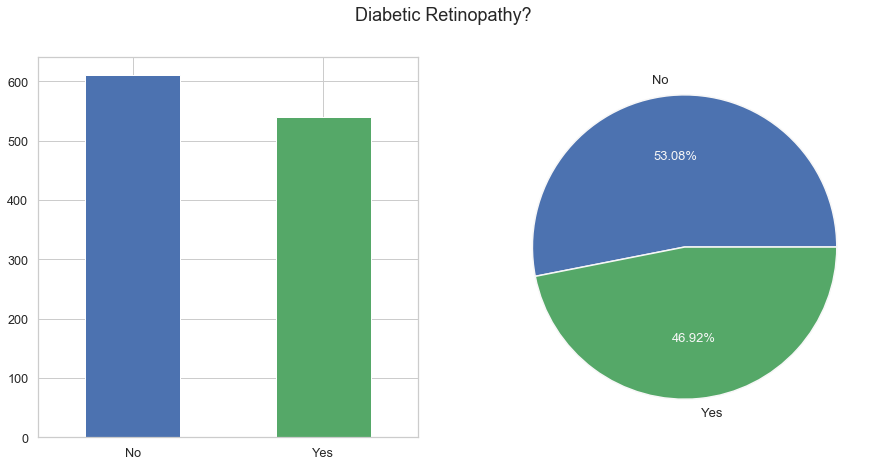

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetic Retinopathy?", fontsize = 18.)
_ = df.Class.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.Class.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

Dari grafik diatas dapat dilihat bahwa, berdasarkan kolom "Class" terdapat 53.08% data yang tidak menunjukkan tanda-tanda DR dan 46.92% data yang menunjukkan tanda-tanda DR. Adanya perbandingan persentase antara label positif (menunjukkan tanda-tanda DR) dan label negatif (tidak menunjukkan tanda-tanda DR) yang tidak terlalu signifikan menunjukkan bahwa dataset yang digunakan oleh penulis sudah dalam keadaan seimbang (*balanced*) sehingga sudah cukup baik untuk dijadikan sebagai input model klasifikasi.

###Pair Plot

Pairplot yang digunakan untuk dataset ini dibuat untuk memvisualisasikan hubungan antara dua variabel yang dalam dataset yang digunakan. Pairplot divisualisasikan dalam bentuk *grid of plots* untuk setiap variabel dalam dataset yang digunakan. Hal ini membantu untuk melihat secara cepat hubungan antara variabel-variabel yang ada sehingga mudah untuk menarik kesimpulan variabel-variabel mana saja yang berguna, yang memiliki *skewed distribution*, dan lain sebagainya.

Data pada dataset yang digunakan penulis memiliki variabel yang banyak. Dalam kasus seperti itu, hubungan antara masing-masing dan setiap variabel harus dianalisis. Plot Distribusi Bivariat untuk kombinasi (n, 2) akan menjadi proses yang sangat kompleks dan memakan waktu.

Untuk membuat plot beberapa distribusi bivariat berpasangan dalam dataset, dapat digunakan fungsi pairplot () dari seaborn. Fungsi ini menunjukkan hubungan untuk kombinasi (n,2) variabel dalam DataFrame sebagai matriks plot dengan plot diagonal adalah plot univariat [5]. Disini digunakan variabel "Class" sebagai *hue* (Variabel dalam data untuk memetakan aspek plot ke warna yang berbeda).

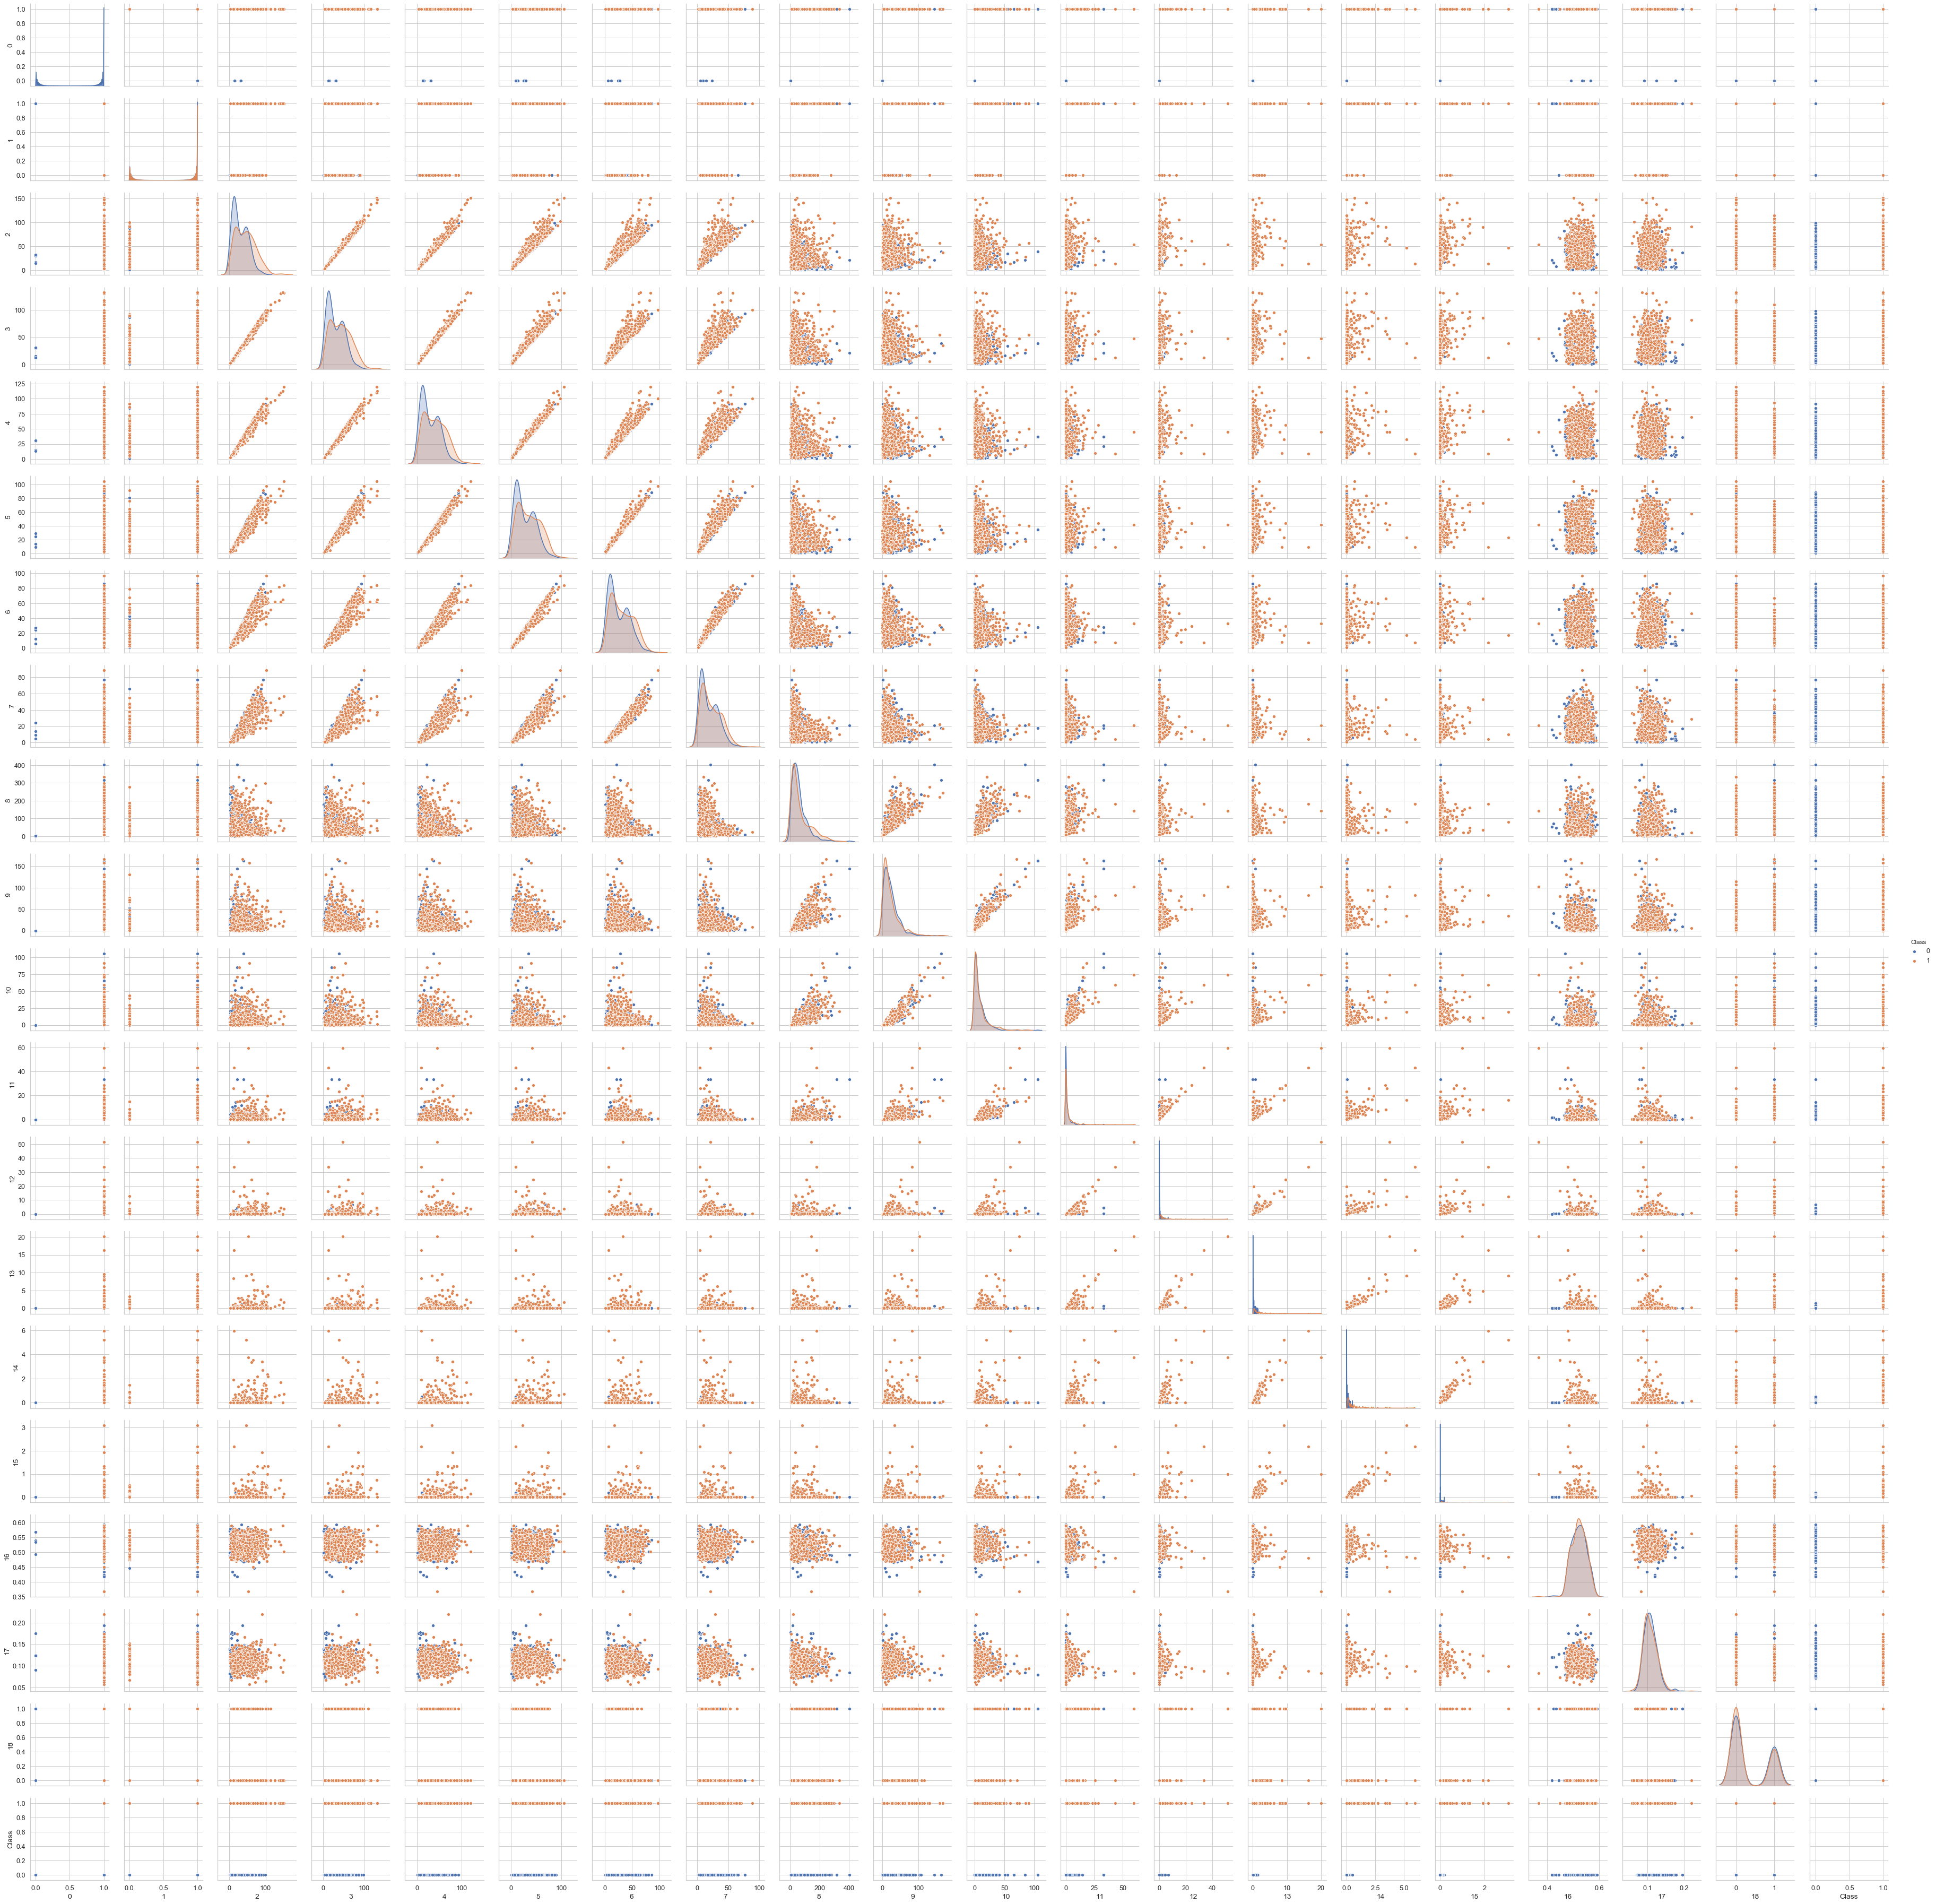

In [ ]:
sns.pairplot(data=df,hue='Class') #melihat hubungan antara satu varibel dengan dua variabel

###Korelasi antar fitur

Variabel dalam dataset dapat dikaitkan karena banyak alasan. Ini dapat berguna dalam analisis dan pemodelan data untuk lebih memahami hubungan antar variabel. Hubungan statistik antara dua variabel disebut sebagai korelasinya.

Korelasi bisa positif, artinya kedua variabel bergerak ke arah yang sama, atau negatif, yang berarti bahwa ketika nilai satu variabel meningkat, nilai variabel lain menurun. Korelasi juga bisa neural atau nol, artinya variabel tidak berhubungan. [6]

Korelasi antar variabel ini dapat dilihat menggunakan fungsi *corr* dan *heatmap* dari seaborn. Berikut contoh cara penggunaannya, 

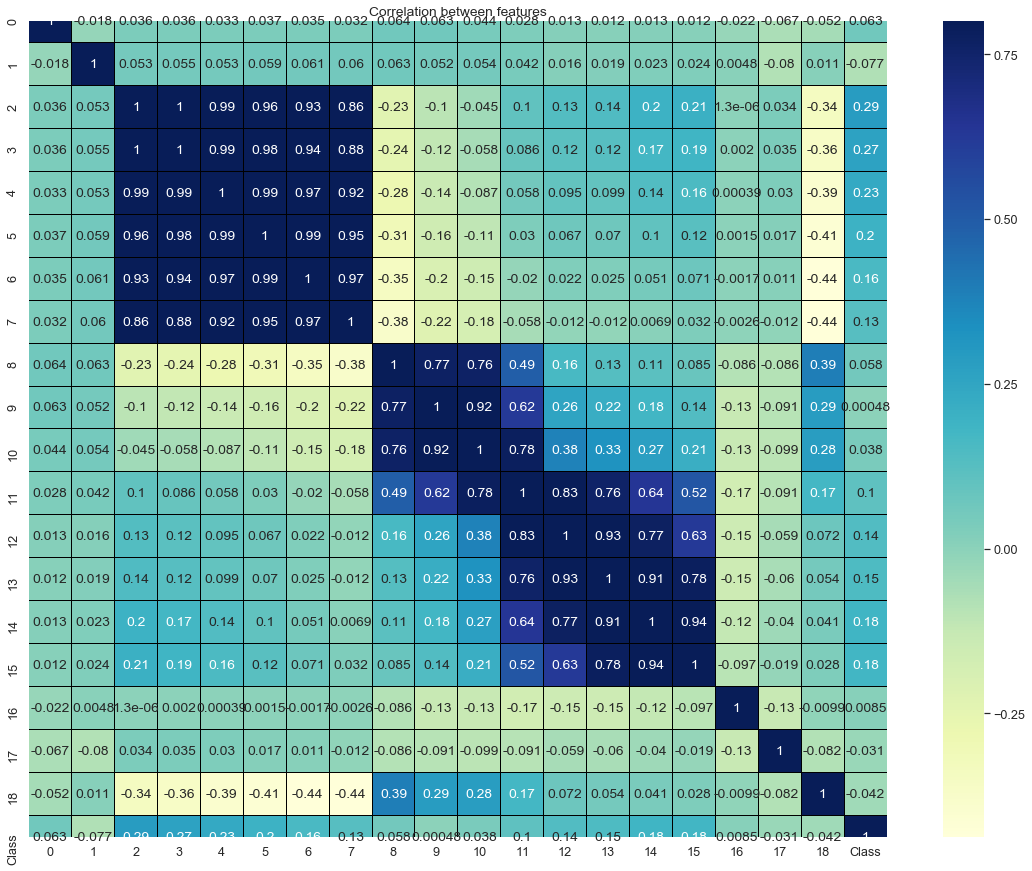

In [ ]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(20, 15))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

*corr()* pada code ini digunakan untuk mengevaluasi korelasi antara semua fitur yang kemudian ditampilkan dalam bentuk grafik seperti yang tertera di atas. Kotak-kotak yang berwarna biru gelap menunjukan korelasi positif sempurna dimana jika warnanya semakin gelap artinya semakin positif korelasi diantara fitur-fitur yang ada pada dataset yang digunakan, sedangkan kotak-kotak yang berwarna putih menunjukan korelasi negatif antar fitur. Ketika melakukan evaluasi antar semua fitur, *corr()* juga melakukan evaluasi setiap fitur dengan dirinya sendiri, yang mana ditunjukan dengan angka 1 pada grafik di atas. Hal ini lah yang menyebabkan grafik korelasi selalu mempunyai kotak-kotak diagonal dari bagian kiri atas ke kanan bawah. Sama hal nya dengan pairplot, biasanya grafik ini ditampilkan untuk mempermudah melihat isi dataset untuk menentukan langkah pengolahan data selanjutnya.

#***PREDICTIVE MODELLING***

**Import Library**

In [ ]:
from sklearn.metrics import accuracy_score #menghitung nilai akurasi
from sklearn.metrics import classification_report #menyimpan hasil klasifikasi
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split #membagi dataset menjadi train dan test

X = df.iloc[:, :-1]#menggunakan data set semua baris dan kolom kecuali kolom terakhir
y = df.iloc[:, -1] #menggunakan kolom terakhir pada dataset


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

In [ ]:
accuracies = {}

Berikut adalah alterntif model yang terdapat pada teknik *supervised learning*.

***Logistic Regression***

Regresi logistik adalah sebuah pendekatan untuk membuat model prediksi seperti halnya regresi linear atau yang biasa disebut dengan istilah *Ordinary Least Squares* (OLS) regression. Perbedaannya adalah pada regresi logistik, user memprediksi variabel terikat yang berskala dikotomi. Skala dikotomi yang dimaksud adalah skala data nominal dengan dua kategori, misalnya: ya dan tidak, baik dan buruk, atau tinggi dan rendah [8]. Pada dasarnya, regresi logistik juga menggunakan formula regresi sederhana. Kemudian, dari formula ini, digunakanlah fungsi sigmoid, untuk menghitung probabilitasnya, sehingga didapatkan fungsi regresi logistic [9]. Regresi logistik biner adalah salah satu metode statistika yang menggambarkan hubungan antara variabel respon (y) dengan satu atau lebih variabel prediktor (x), dimana variabel respon dalam regresi logistik adalah biner atau dikotomi yaitu hanya memiliki dua kategori [10]. Menurut Agresti, variabel y akan mengikuti distribusi Bernoulli untuk setiap observasi tunggal dan ditentukan probabilitas [11]. Prinsip kerja metode ini adalah dengan cara memproyeksikan nilai input ke model regresi logistic sehingga akan diperoleh nilai probabilitasnya. Selanjutnya, nilai probabilitas ini akan digolongkan menjadi nilai 0 atau 1 sesuai dengan batas probabilitas yang telah ditentukan [9]. 

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train) 
acc = lr.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 73.26%


Untuk menggunakan metode regresi logistik, dapat memanfaatkan fungsi LogisticRegression yang telah disediakan oleh modul sklearn. Pada kasus ini, regresi logistik menghasilkan nilai akurasi tertinggi yakni 73.26%. Hal ini dikarenakan dataset yang digunakan pada kasus ini memiliki fitur-fitur linear dan variabel-variabel yang digunakan pada dataset ini bergantung (*dependent*) serta memiliki korelasi satu sama lain.<br>
Regresi logistik tidak dapat digunakan untuk menangani dataset yang memiliki terlalu banyak fitur atau variabel karena rentan *overfitting*. Keuntungan menggunakan regresi logistik, diantaranya: tidak memerlukan komputasi tinggi, mudah untuk diimplementasikan, mudah untuk diinterpretasikan, dan telah umum digunakan [20].





**SVM**

SVM merupakan salah satu metode klasifikasi pada supervised learning yang dapat digunakan pada data yang *linearly separable* dan *not fully linearly separable*. Selain dapat menangani masalah *separability*, SVM juga dapat digunakan untuk menangani masalah pada data yang memiliki dimensi tinggi (lebih dari 2 dimensi). Pada kasus data 2 dimensi, data dapat dipisahkan dengan menggunakan garis, tetapi pada dimensi yang lebih tinggi, dibutuhkan hyperplanes untuk memisahkan [16]. SVM berusaha menemukan *hyperplane* (pemisah) terbaik untuk memisahkan ke dalam dua kelas dan memaksimalkan margin antara dua kelas tersebut. Pada beberapa kasus, data tidak bisa diklasifikasi menggunakan metode linier SVM, sehingga dikembangkan fungsi kernel untuk mengklasifikasikan data dalam bentuk nonlinier [15]. Fungsi kernel dalam metode ini sering disebut dengan kernel trick. Kernel trick adalah fungsi yang mengelompokkan data dari dimensi rendah ke dimensi tinggi (Prasetyo, 2012). 

In [ ]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 60.07%


Support Vector Machine sebenarnya dapat digunakan untuk melakukan regresi maupun klasifikasi, namun kebanyakan metode ini digunakan untuk klasifikasi. Pada kasus ini, nilai akurasi dari SVM lebih redah dibandingkan metode logistic regression, yakni 60.07%. Hal ini dikarenakan dataset yang digunakan oleh penulis pada kasus ini masih tergolong sederhana (hanya memiliki 19 fitur). SVM paling baik digunakan untuk kasus-kasus dengan dataset yang kompleks yang memiliki banyak sekali fitur karena SVM bekerja dengan *high dimensional space* . Hal lain yang memengaruhi akurasi dari SVM adalah pemilihan *multiclass method*, pemilihan optimizer dalam SVM nya sendiri, dan jenis dari fungsi kernel yang digunakan.

**Naive Bayes**

Metode klasifikasi Naïve Bayes adalah suatu metode klasifikasi yang didasari oleh teorema Bayes. Teorema Bayes didasarkan oleh probabilitas suatu kejadian berdasarkan kejadian lain yang telah terjadi. Asumsi “Naïve” pada metode ini merupakan suatu asumsi dimana setiap kondisi dan fitur adalah independen [7]. Naïve Bayes dapat melakukan analisis data yang cepat, *training data* yang cepat, serta interpretasi langsung dari hasil pengujian. Hal ini disebabkan oleh asumsi variabel independen yang mengakibatkan hanya variansi dari suatu variabel dalam sebuah kelas yang dibutuhkan untuk klasifikasi, bukan keseluruhan dari matriks data [13]. Berdasarkan penelitian di Loughborough University, Naïve Bayes memiliki akurasi, dan presisi yang lebih tinggi dibandingkan dengan metode yang lebih kompleks seperti *Decision Trees* dan *Neural Networks* [9]. 

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 56.60%


Akurasi Naive Bayes yang digunakan pada kasus ini lebih rendah dibandingkan dengan dua metode yang digunakan sebelumnya, yakni hanya 56.60%. Hal ini disebabkan oleh beberapa faktor, salah satunya adalah pemilihan fitur yang digunakan. Semakin sedikit fitur yang dipilih, maka semakin sedikit pula dimensi dari *feature space*. Pada metode naive bayes, apabila variabel kategorikal (*categorical variable*) memiliki sebuah kategori (pada test set) yang tidak terobservasi pada training set, maka metode ini akan memberikan nilai probabilitas 0.<br>
Metode ini merupakan sebuah estimator yang buruk. Keterbatasan lain yang dimiliki metode ini adalah asumsi mengenai *independent predictors* [21].

**Linear Discriminant Analysis**

*Linear Discriminant Analysis* merupakan teknik yang umum digunakan untuk pengurangan dimensionalitas sebagai langkah *preprocessing* untuk *machine learning* dan aplikasi untuk mengklasifikasi pola.  Tujuan dari teknik Linear Discriminant Analysis (LDA) adalah untuk memproyeksikan data matriks yang asli menjadi dimensi yang rendah.

In [ ]:
lda = LDA()
lda.fit(X_train, y_train)

acc = lda.score(X_test,y_test)*100
accuracies['Linear Discriminant Analysis'] = acc
print("Accuracy of Linear Discriminant Analysis: {:.2f}%".format(acc))

Accuracy of Linear Discriminant Analysis: 69.79%


Nilai akurasi dari metode LDA yang digunakan pada kasus ini cukup tinggi, yakni 69,79%. Hal ini disebabkan karena fitur yang digunakan pada dataset ini tergolong sedikit. Sama seperti metode regresi logistik, metode LDA tidak dapat digunakan untuk menangani dataset yang memiliki terlalu banyak fitur atau variabel karena rentan *overfitting*. Akurasi LDA bergantung kepada ukuran sampel dan homogenitas dari variansi dan kovariansi yang terdapat dalam dataset. Semakin sama ukuran sampel dan semakin homogen variansi dan kovariansi yang dimiliki, maka akurasi LDA akan semakin tinggi.

**Decision Tree**

*Decision tree* adalah salah satu metode klasifikasi yang paling populer, karena mudah untuk diinterpretasi oleh manusia. *Decision tree* adalah model prediksi menggunakan struktur pohon atau struktur berhirarki. Konsep dari metode ini adalah mengubah data menjadi *decision tree* dan aturan-aturan keputusan. Manfaat utama dari penggunaan *decision tree* adalah kemampuannya untuk mem-*break down* proses pengambilan keputusan yang kompleks menjadi lebih sederhana, sehingga pengambil keputusan akan lebih menginterpretasikan solusi dari permasalahan. Nama lain dari *decision tree* adalah CART (Classification and Regression Tree). Dimana metode ini merupakan gabungan dari dua jenis pohon, yaitu *classification tree* dan juga *regression tree* [22].

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 63.19%


*Decision tree* dapat digunakan untuk klasifikasi maupun regresi. Faktor utama yang menentukan tingkat akurasi dari metode *decision tree* adalah keputusan dalam membuat strategi pembagian (*splitting*), dimana seorang developer harus bisa mengidentifikasi atribut mana yang digunakan sebagai *root node* dan atribut mana yang digunakan sebagai *branch*. Pada kasus ini, akurasi yang diperoleh menggunakan metode ini cukup baik yakni 63.19%

**Random Forest**

Metode *Random Forest*  merupakan salah satu metode dalam *Decision Tree*. *Random forest* adalah kombinasi dari masing–masing *tree* yang baik kemudian dikombinasikan  ke dalam satu model. *Random Forest* bergantung pada sebuah nilai *vector random* dengan distribusi yang sama pada semua pohon yang masing masing *decision tree* memiliki kedalaman yang maksimal. *Random forest* adalah *classifier* yang terdiri dari *classifier* yang berbentuk pohon {h(x, θ k ), k = 1, . . .} dimana θk adalah random vektor yang diditribusikan secara independen dan masing masing *tree* pada sebuah unit kan memilih kelas yang paling popular pada input x [25].

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 68.40%


*Random forest* pada dasarnya merupakan salah satu bentuk dari *decision tree* yang memiliki *hyperparameter* di dalamnya. *Random forest* sendiri memiliki algoritma *out-of-the-box* yang menyokong tingkat akurasi *random forest* dalam berbagai kasus.<br>
*Random forest* lebih cepat memproses data dibandingkan *bagging* dan *decision tree* dimana semakin kecil *feature search space* pada setiap *tree split* maka semakin sedikit runtime yang diperlukan [26]. Hal ini pula yang menyebabkan tingkat akurasi metode *random forest* lebih tinggi daripada tingkat akurasi metode *decision tree* pada kasus ini.

**KNN**

K-Nearest Algorithm merupakan salah satu algoritma *supervised learning* yang mana hasil *query instance* yang baru diklasifikasikan berdasarkan mayoritas kedekatan jarak dari kategori yang ada dalam K-Nearest Neighbor [12].  Tujuan dari algoritma ini adalah untuk mengklasifikasikan obyek baru berdasarkan atribut dan sampel-sampel dari data *training* [10]. Pada pengkategorian jarak dari kategori digunakan *Euclidean Distance* dengan rumus sebagai berikut. 

Pada algoritma K-Nearest Neighbor memiliki kelebihan yang mana implementasi dari algoritma ini cukup sederhana. Selain itu dalam hal melakukan pencarian dapat dilakukan lebih cepat karena kelas untuk pengklasifikasian tidak harus linear dipisahkan. Dan algoritma ini dapat melakukan perhitungan efektif terhadap data dalam skala kecil [10]. 

Namun, kelemahan dari algoritma K-Nearest Neighbor ialah diperlukannya penentuan nilai K yang optimal sehingga untuk menyatakan jumlah tetangga terdekatnya lebih mudah. Pada data dengan skala besar cenderung memberikan nilai akurasi yang tidak baik mengingat pada algoritma ini tidak dilakukannya pengisian terhadap nilai kosong (*missing value*) secara implisit. Dengan harus terus melakukan perhitungan jarak pada tiap *query instance*, mengakibatkan biaya komputasi yang tinggi [11].  Selain itu pada data dengan variabel banyak,akibat tidak dilakukannya prioritas variabel nilai yang akan keluar hanyalah variabel yang memiliki jarak terdekat bukan berdasarkan bobot yang dimiliki untuk penentuan klasifikasi [12].

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 NN Score: 61.81%


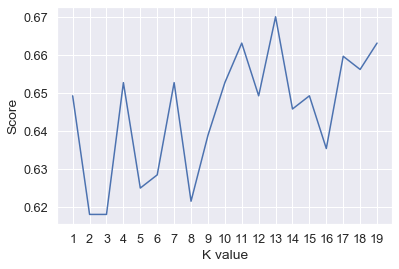

Maximum KNN Score is 67.01%


In [ ]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))


Metode K-Nearest Neighbor
Berdasarkan pengunaan metode K-Nearest Neighbor yang diperoleh dari fungsi built-in pada scikit-learn, diperoleh nilai maksimum akurasi yang diperoleh ialah 67.01%. Nilai dataset berupa nilai yang memiliki rentan nilai yang tinggi hal tersebut ditunjukkan pada atribut 8-15. Diantara atribut tersebut terdapat nilai 0 dan juga nilai 179,704. Salah satu kelemahan dari metode KNN adalah rentan nilai yang tinggi. Hal ini diakibatkan oleh pada metode ini anggapan bahwa semua nilai variabel setara serta sama penting. Oleh karena itu jika terdapat variabel yang memiliki rentang jauh lebih besar dibanding variabel-variabel lainnya, maka perhitungan jarak akan didominasi oleh variabel tersebut. Untuk itu perlu dilakukan perbandingan lebih lanjut terhadap metode lainnya.

**Linear Regression**

Tujuan dari regresi adalah untuk memprediksi nilai dari satu atau lebih variabel-variabel target kontinyu t yang memberikan nilai dari D-dimensi vector x dari variabel input. Regresi linear adalah sebuah pendekatan linear untuk memodelkan hubungan antara respon skalar (*dependent variable*) dan satu atau lebih *explanatory variable* (*independent variables*). Pada regresi linear, hubungan antar-variabel dimodelkan menggunakan *linear predictor functions* dimana parameter-parameter model yang belum diketahui diestimasi dari data. Regresi linear memiliki banyak kegunaan, yang dibagi menjadi dua kategori: memberi prediksi atau mereduksi kesalahan, dan menjabarkan variasi variabel.

In [ ]:
linr = LinearRegression()
linr.fit(X_train, y_train)

acc = linr.score(X_test,y_test)*100
accuracies['Linear Regression'] = acc
print("Linear Regression Algorithm Accuracy Score : {:.2f}%".format(acc))

Linear Regression Algorithm Accuracy Score : 17.29%


Metode regresi linear memiliki tingkat akurasi paling buruk dalam kasus ini, yakni sebesar 17,29%. Hal ini disebabkan karena hubungan antar fitur dalam dataset ini tidak begitu jelas walaupun fitur yang digunakan terhitung sedikit sehingga penulis tidak bisa membuat *derivative fields* yang dapat memetakan data secara linear.<br>
Pada kasus ini terdapat *multiple variable* sehingga tidak bisa menggunakan pendekatan regresi linear biasa. Apabila akurasinya ingin ditingkatkan, maka langkah yang harus dilakukan adalah mencari *field* yang signifikan ke kelasnya. Dan apabila terdapat lebih dari satu *field*, maka harus dicoba satu per satu dengan cara mencari *pvalues* tertinggi. Kemudian data yang akan digunakan di-*reconstruct* di *field* tertinggi. Kemudian baru dijalankan prosedur regresi linear biasa.<br>
Metode regresi linear digunakan untuk mencari hubungan linear antara *dependent variable* Y dan satu atau lebih variabel bebas X. Tingkat akurasi dari metode ini dipengaruhi oleh beberapa hal, seperti: kausalitas data, perencanaan ukuran sampel, *missing values*, sampel data, dan pemilihan variabel [23].

**Neural networks (multi layer perceptron)**

*Neural networks* merupakan *computing systems* yang mengacu pada *biological neural networks* pada hewan. Sistem ini “belajar” untuk melakukan pekerjaan dengan “mengingat” contoh-contoh. Sistem ini didasarkan pada sekumpulan unit yang terkoneksi (node) yang disebut dengan *artificial neurons*. Setiap koneksi – seperti sinaps pada otak – dapat mentransmisikan sebuah sinyal ke neuron lain. *Artificial neuron* yang menerima sinyal tersebut kemudian memroses sinyal tersebut dan meneruskannya ke neuron lain. Pada implementasinya, “sinyal” pada koneksi ini berupa sebuah bilangan riil dan keluaran dari setiap neuron dihitung menggunakan fungsi non-linear dari penjumlahan inputnya. Pendekatan menggunakan *neural networks* digunakan untuk menyelesaikan masalah-masalah dengan cara yang sama seperti yang otak lakukan. Namun seiring waktu, metode ini digunakan untuk melakukan tugas-tugas spesifik, seperti: *computer vision, speech recognition, machine translation, social network filtering, playing board and video games*, dan *medical diagnosis* [4]. 

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

acc = mlp.score(X_test,y_test)*100
accuracies['MLP'] = acc
print("Multi Layer Perceptron Algorithm Accuracy Score : {:.2f}%".format(acc))

Multi Layer Perceptron Algorithm Accuracy Score : 72.22%


Tingkat akurasi yang tinggi diperoleh menggunakan metode *multi layer perceptron* sebesar 72,22%. Performa dari *neural network* sangat bergantung saat proses *training* dimana pada MLP digunakan *back propagation*. Pada MLP, nilai *error* antara *output* yang sebenarnya dengan *output* yang dibutuhkan dievaluasi dan dipropagasikan ke belakang (*backward*). Kunci lain yang juga menentukan tingkat akurasi dari MLP adalah pemilihan atribut. Dataset yang digunakan untuk melakukan regresi atau klasifikasi mungkin saja masih mengandung data-data yang irelevan dan redundan, maka dari itu diperlukan pembersihan data (*data cleaning*). Proses pembersihan data ini ternyata sangat berpengaruh pada tingkat akurasi penggunaan metode MLP. Semakin bersih data yang digunakan untuk diolah, maka semakin tinggi juga tingkat akurasinya.

**Similarity learning** 

Ketika manusia menyatakan bahwa dua gambar adalah mirip, mereka kebanyakan menyatakan kemiripan tersebut secara relatif dan tidak absolut [14]. Kemampuan  ini merupakan sebuah kemampuan kategorisasi manusia yang luar biasa, dan tidak mudah dilakukan oleh mesin. Mungkin untuk menyatakan kemiripan antara data numerik dapat dilakukan oleh mesin, tapi tidak dengan data visual [17]. Hal inilah yang mendasari terciptanya *similarity learning*, dimana kita mencoba untuk memahami definisi kemiripan dari perspektif manusia [18]. Beberapa penggunaan dari similarity learning adalah, mengenali tulisan tangan, deteksi wajah dalam foto, dan juga digunakan dalam mesin pencarian seperti google.  

Untuk menghitung kemiripan dari dua elemen yang berbeda, digunakan metric. Metric adalah suatu fungsi yang menghitung “jarak” antara dua elemen, ini digunakan agar perbedaan dari dua elemen tersebut dapat dihitung secara kuantitatif [19]. 

Dalam dataset ini, metode ini tidak dapat digunakan karena karakteristik dari dataset ini digunakan untuk melakukan klasifikasi terkait DR.

**EVALUASI**

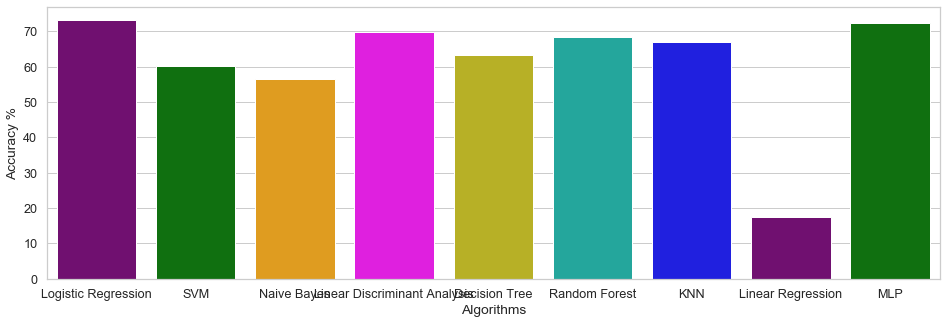

In [ ]:
colors = ["purple", "green", "orange", "magenta", "#CFC60E", "#0FBBAE", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=np.array(list(accuracies.keys())), y=np.array(list(accuracies.values())), palette=colors)
plt.show()

In [ ]:
y_head_lr = lr.predict(X_test)
knn13 = KNeighborsClassifier(n_neighbors = 13)
knn13.fit(X_train, y_train)
y_head_knn = knn13.predict(X_test)
y_head_svm = svm.predict(X_test)
y_head_nb = nb.predict(X_test)
y_head_dtc = dtc.predict(X_test)
y_head_rf = rf.predict(X_test)
y_head_linr = linr.predict(X_test)
y_head_mlp = mlp.predict(X_test)

In [ ]:
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_linr = confusion_matrix(y_test,y_head_linr.round())
cm_mlp = confusion_matrix(y_test,y_head_mlp)

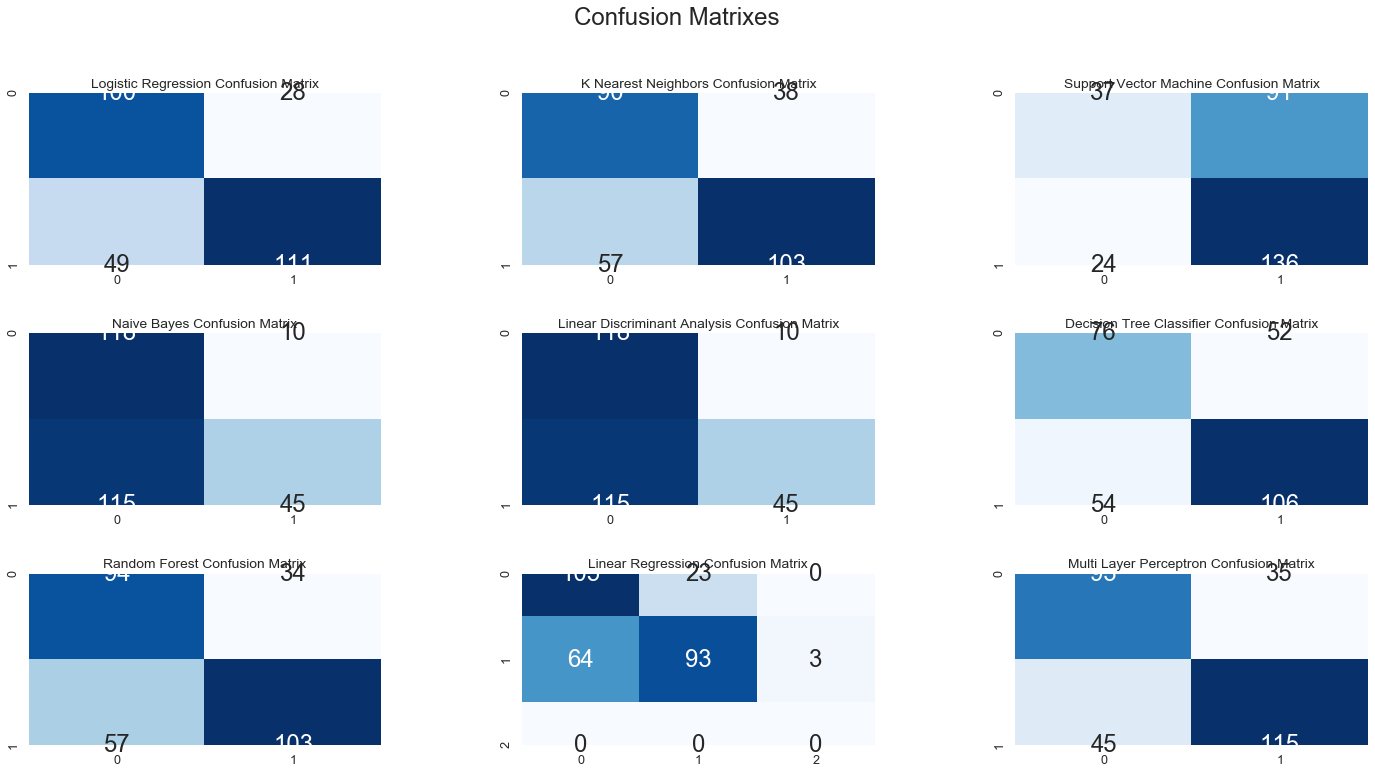

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Linear Discriminant Analysis Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,8)
plt.title("Linear Regression Confusion Matrix")
sns.heatmap(cm_linr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,9)
plt.title("Multi Layer Perceptron Confusion Matrix")
sns.heatmap(cm_mlp,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

*Confusion matrix* merupakan sebuah matriks yang digunakan untuk mendeskripsikan performa dari sebuah model klasifikasi dari sebuah dataset [24]. Dari *confusion matriks* di atas dapat kita lihat visualisasi data dari tingkat akurasi dan performa dari metode-metode yang digunakan pada pembahasan kali ini. Cara membaca *confusion matrix* cukup sederhana. Angka 0 merepresentasikan "NO", sedangkan angka 1 merepresentasikan "YES". Baris ke kanan menunjukan "Predicted Value", sedangkan kolom ke bawah menunjukan "Actual Value".<br>
Dari confusion matrix ini, dapat kita peroleh empat nilai : *True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)*. TP diperoleh ketika *predicted value* dan *actual value* bernilai 1. TN diperoleh ketika *predicted value* dan *actual value* bernilai 0. FP diperoleh ketika *predicted value* bernilai 1 dan *actual value* bernilai 0. FN diperoleh ketika *predicted value* bernilai 0 dan *actual value* bernilai 1.

**KESIMPULAN**

---
Dari percobaan dan pembahasan kali ini diperoleh kesimpulan bahwa untuk kasus klasifikasi menggunakan dataset Diabetes Retinopathy, paling baik digunakan metode regresi logistik, disusul dengan metode *Multi-Layer Perceptron* dengan penjelasan yang telah dipaparkan pada bagian **(5)**; dan akurasi klasifikasi terburuk diperoleh menggunakan metode regresi linear yang juga telah dijelaskan pada bagian **(5)**.<br>
Performa metode-metode yang digunakan juga dapat dilihat secara keseluruhan melalui *confusion matrix* yang tertera pada bagian **EVALUASI**.


**WRITERS' PROFILE**



1.   Iftika Rahmi F. (18316029)<br>
Iftika has been studying at Bandung Institute of Technology with major in Biomedical Engineering. Her interest is in Machine Learning and Biosensor. She is currently a secretary in Electrotechnical Student Association (HME: Himpunan Mahasiswa Elektroteknik), and also a member of IEEE ITB Student Branch. 
2.   Dewanti S. Geavonny (18316030)<br>
Geavonny has been studying at Bandung Institute of Technology with major in Biomedical Engineering. As a student in biomedical engineering field, she has interest in hardware and medical devices. Besides engineering, she also has interest in finance and management field. She loves music and movie. She plays keyboard and sings as well. She has performed at music concert as keyboardist and  many other event as choir.
3.   Patricia Margaretha P. (18316031)<br>
Patricia has been studying at Bandung Institute of Technology with major in Biomedical Engineering. She is currently a Chairwoman of IEEE ITB Student Branch, and also a Co-founder of Herrscher Ingenieur Gereedschap Startup. Her interest is in Radiology field, especially Artificial Intelligence for Radiology. Outside her major, she also has interest in business and management.
4.   Shidqie Taufiqurrahman (18316032)<br>
Shidqie has been studying at Bandung Institute of Technology with major in Biomedical Engineering. He is now currently head of computer division of computer in Electrotechnical Student Association (HME: Himpunan Mahasiswa Elektroteknik) and also an intern at the Qimtronic company. His interest is in artificial intelligence for health sector and also health economics and policy.
5.   Nadia Azka Huda P. (18316033)<br>
Nadia has been studying at Bandung Institute of Technology with major in Biomedical Engineering. Her interest is in Artificial Intelligent for Health Sector. She is currently one of a Vice Minister in Electrotechnical Student Association (HME: Himpunan Mahasiswa Elektroteknik).



**REFERENSI**

---


[1] https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set<br>
[2] http://www.adcis.net/en/third-party/messidor/<br>
[3] Antal, Balint & Hajdu, András. (2014). An ensemble-based system for automatic screening of diabetic retinopathy. Knowledge-Based Systems. 60. 10.1016/j.knosys.2013.12.023. <br>
[4]https://www.kaggle.com/ialimustufa/titanic-beginner-s-guide-with-sklearn<br>
[5]https://www.tutorialspoint.com/seaborn/seaborn_visualizing_pairwise_relationship.htm<br>
[6]https://www.kaggle.com/rishpande/pima-indians-diabetes-beginner#Data-Visualization<br>
[7] Stuart J. Russell, Peter Norvig (2010) Artificial Intelligence: A Modern Approach, Third Edition, Prentice Hall ISBN 9780136042594.<br>
[8] https://www.megabagus.id/machine-learning-logistic-regression/. Diakses pada 30 September 2019 pukul 06.27 WIB<br>
[9] http://machinelearning.mipa.ugm.ac.id/2018/05/20/statistical-machine-learning/#targetText=Statistika%20dan%20machine%20learning%20membentuk,dengan%20menggunakan%20model%20regresi%20logistik.&targetText=Regresi%20logistik%20adalah%20sebuah%20pendekatan,Least%20Squares%20(OLS)%20regression. Diakses pada 30 September 2019 pukul 06.20 WIB<br>
[10] Samosir, dkk. 2015. Perbandingan Metode Klasifikasi Regresi Logistik Biner Dan Radial Basis Function Network Pada Berat Bayi Lahir Rendah (Studi Kasus: Puskesmas Pamenang Kota Jambi) . Jurnal Gaussian, Volume 4, Nomor 4, Halaman 997-1005 : ISSN: 2339-2541<br>
[11] Agresti, A. 2002. Categorical Data Analysis Second Edition. Jhon Wiley & Sons, Inc: USA<br>
[12] https://informatikalogi.com/algoritma-k-nn-k-nearest-neighbor/, diakses pada 29 September pukul 15.00 WIB<br>
[13] https://informatikalogi.com/algoritma-naive-bayes/, diakses pada 29 September 2019, pukul 22.01WIB.<br>
[14] N. M. Seel. (2012). Encyclopedia of the Sciences of Learning. Berlin: Springer.<br>
[15] Pratama, dkk. 2018. Implementasi Algoritme Support Vector Machine (SVM) untuk Prediksi Ketepatan Waktu Kelulusan Mahasiswa. Jurnal Pengembangan Teknologi Informasi dan Ilmu Komputer : Vol. 2, No. 4, hlm. 1704-1708.<br>
[16] Berwick, Idiot. An Idiot’s Guide To Support Vector Machines (SVMs). http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf. Diakses pada 30 September pukul 02.30 WIB<br>
[17] Smeulders, A. W. M., Worring, M., Santini, S., Gupta, A., & Jain, R. (2000). Content based image retrieval at the end of the early years. IEEE Transactions on Pattern Analysis and Machine Intelligence, 22(12), 1349–1380<br>
[18] Tversky, A. (1977). Features of similarity. Psychological Review, 84, 327–352.<br>
[19] M. Chatterjee, Y. Luo. Similarity Learning with (or without) Convolutional Neural Network. http://slazebni.cs.illinois.edu/spring17/lec09_similarity.pdf. Diakses pada 30 September pukul 03.30 WIB<br>
[20] https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python, diakses pada 24 November 2019 pukul 05.29 WIB<br>
[21] https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf, diakses pada 24 November 2019, pukul 06.05 WIB<br>
[22] https://medium.com/iykra/mengenal-decision-tree-dan-manfaatnya-b98cf3cf6a8d, diakses pada 24 November 2019, pukul 06.09 WIB<br>
[23] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2992018/, diakses pada 24 November 2019, pukul 06.46 WIB<br>
[24] https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/, diakses pada 24 November 2019, pukul 07.05 WIB<br>
[25] http://machinelearning.mipa.ugm.ac.id/2018/07/28/random-forest/, diakses pada 24 November 2019, pukul 07.35 WIB<br>
[26] https://bradleyboehmke.github.io/HOML/random-forest.html, diakses pada 24 November 2019, pukul 07.49 WIB